In [2]:
from constants import *
from utils import *
from  error_plots import *  

In [3]:
data_raw[('f1', 0, 1)]

[array([164, 164, 152, ..., -48, -44, -44], dtype=int32),
 array([32764, 32764, 32764, ...,    16,    20,    48], dtype=int32)]

In [4]:
data_raw.keys()

dict_keys([('f1', 0, 1), ('f1', 1, 2), ('f1', 2, 3), ('f1', 3, 4), ('f1', 4, 5), ('f1', 5, 6), ('f1', 6, 7), ('f1', 9, 10), ('f1', 10, 11), ('f1', 11, 12), ('f1', 12, 13), ('f1', 15, 16), ('f1', 16, 17), ('f1', 17, 18), ('f1', 18, 19), ('f1', 19, 20), ('f1', 20, 21), ('f1', 21, 22), ('f1', 24, 25), ('f1', 25, 26), ('f1', 26, 27), ('f1', 27, 28), ('f1', 28, 29), ('f1', 29, 30), ('f1', 30, 31), ('f1', 31, 32), ('f1', 32, 33), ('f1', 33, 34), ('f1', 34, 35), ('f1', 41, 42), ('f1', 42, 43), ('f1', 43, 44), ('f1', 48, 49), ('f1', 49, 50), ('f1', 50, 51), ('f1', 51, 52), ('f1', 52, 53), ('f1', 53, 54), ('f1', 54, 55), ('f1', 55, 56), ('f1', 56, 57), ('f1', 57, 58), ('f1', 58, 59), ('f2', 0, 1), ('f2', 1, 2), ('f2', 4, 5), ('f2', 5, 6), ('f2', 6, 7), ('f2', 9, 10), ('f2', 10, 11), ('f2', 15, 16), ('f2', 16, 17), ('f2', 17, 18), ('f2', 18, 19), ('f2', 19, 20), ('f2', 22, 23), ('f2', 25, 26), ('f2', 26, 27), ('f2', 27, 28), ('f2', 33, 34), ('f2', 34, 35), ('f2', 43, 44), ('f2', 44, 45), ('f2', 

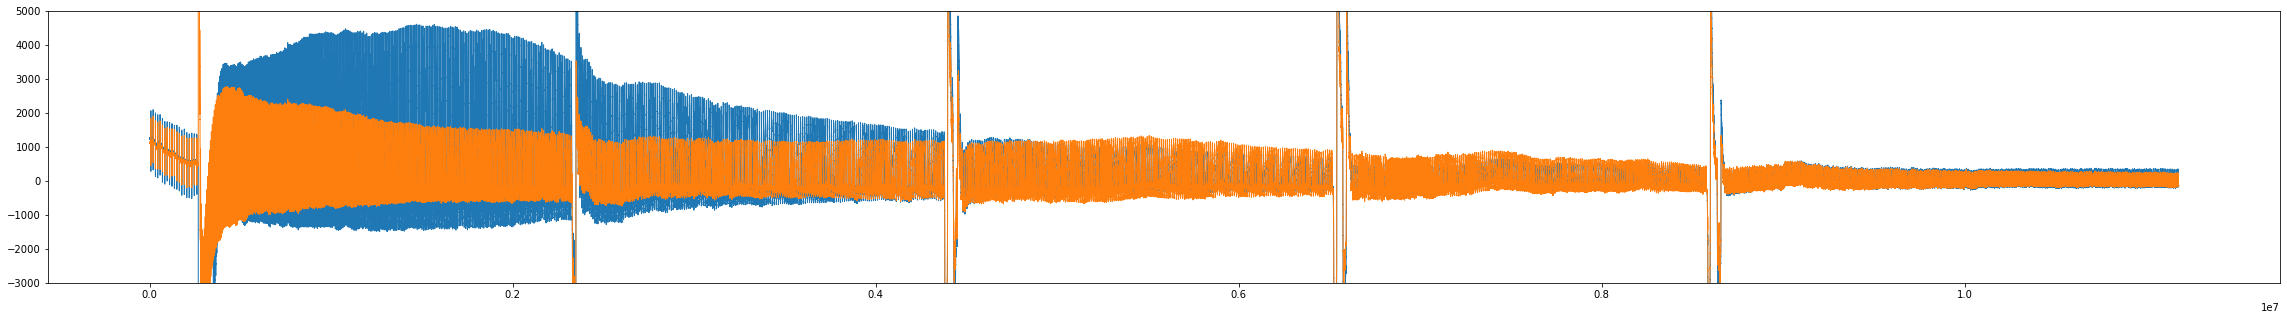

In [5]:
import matplotlib.pyplot as plt
x = data_raw[('f2', 33, 34)]
plt.figure(figsize=(40, 5))
plt.plot(x[0], label="Data 1", linewidth = 1)
plt.plot(x[1], label="Data 2", linewidth =1)
plt.ylim(-3000,5000)
plt.show()


f1 0 1
time [[100000, 340000], [790000, 1500000], [1700000, 2000000], [2200000, 4000000], [4300000, 6100000], [6400000, 8199999]]


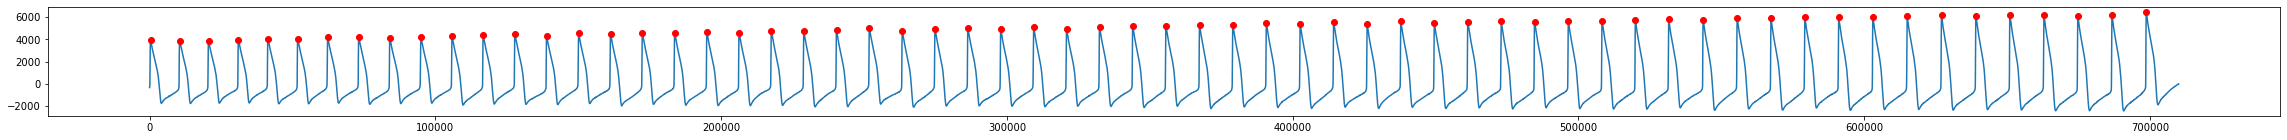

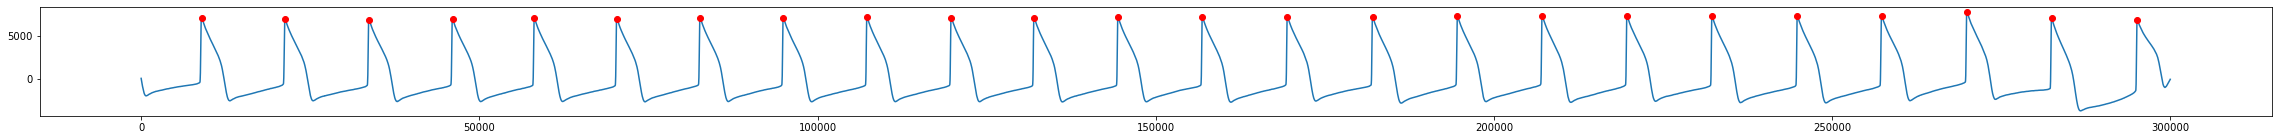

/home/ubuntu/texasfile/paper_codes/general/general_utils.py:54: PeakPropertyWarning: some peaks have a width of 0
  w,h,l,r=peak_widths(period,find_peaks(period,distance=3500)[0],rel_height=relheight)


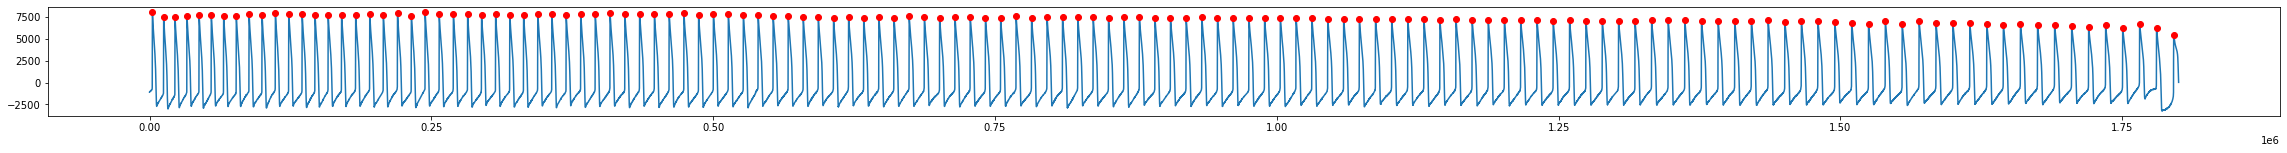

/home/ubuntu/texasfile/paper_codes/general/general_utils.py:54: PeakPropertyWarning: some peaks have a width of 0
  w,h,l,r=peak_widths(period,find_peaks(period,distance=3500)[0],rel_height=relheight)


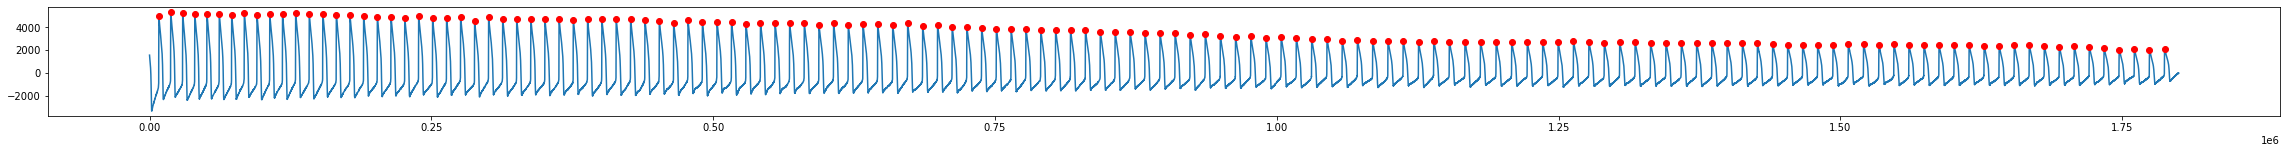

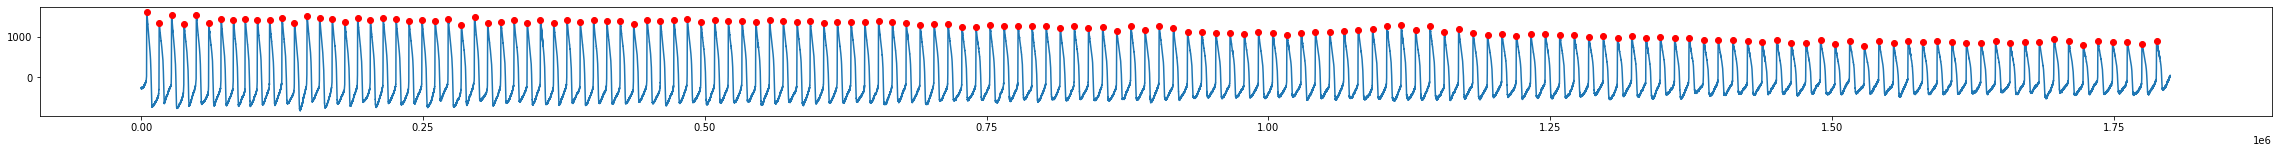

f1 1 2
time [[100000, 340000], [790000, 1500000], [1700000, 2000000], [2200000, 4000000], [4300000, 6100000], [6400000, 8199999]]


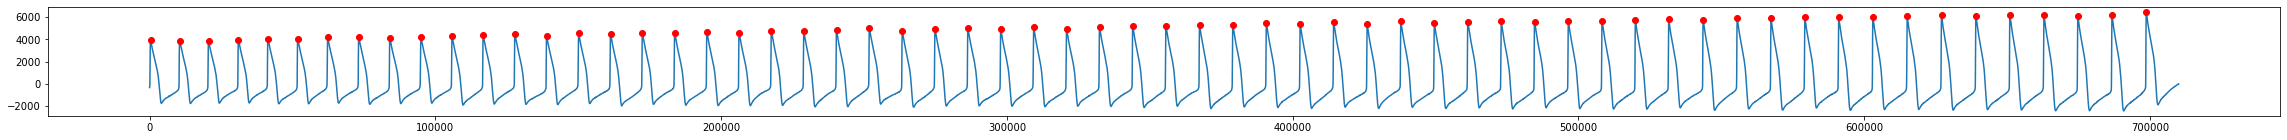

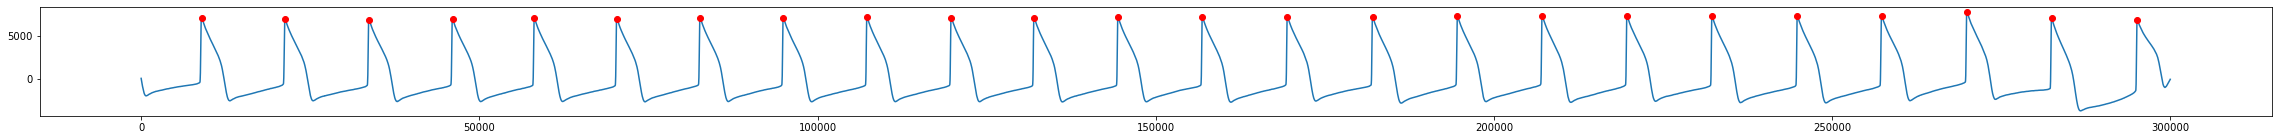

/home/ubuntu/texasfile/paper_codes/general/general_utils.py:54: PeakPropertyWarning: some peaks have a width of 0
  w,h,l,r=peak_widths(period,find_peaks(period,distance=3500)[0],rel_height=relheight)


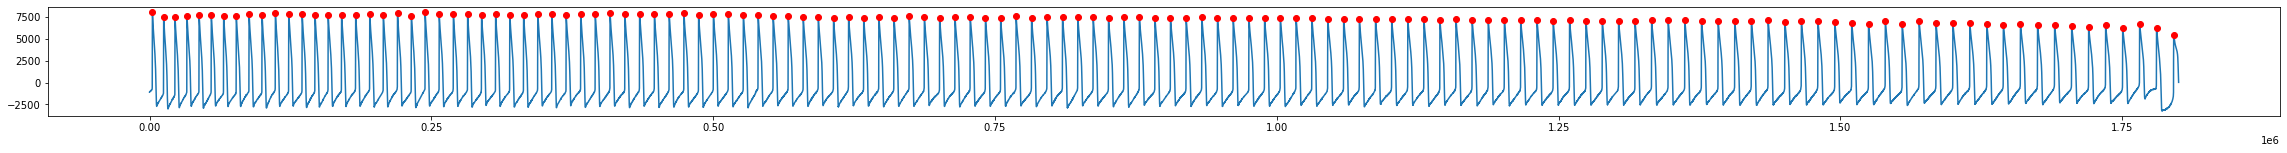

/home/ubuntu/texasfile/paper_codes/general/general_utils.py:54: PeakPropertyWarning: some peaks have a width of 0
  w,h,l,r=peak_widths(period,find_peaks(period,distance=3500)[0],rel_height=relheight)


KeyboardInterrupt: 

In [6]:
df, dic_of_iaps_a,dic_of_iaps_b,dic_of_iaps_r = iap_neighboring_comp(data_raw,times,availablities,baseline_channel)

In [ ]:
df[apds_i_a]
df[apds_i_b]
df[apds_j_a]
df[apds_j_b]

In [ ]:
df_ch1 = df[['ch1','name','t_i']+apds_i_a].rename(columns={'ch1': 'Channel',
                                                          't_i': 't'})
df_ch2 = df[['ch2','name','t_j']+apds_j_a].rename(columns={'ch2': 'Channel',
                                                          't_j': 't'})
new_column_names = ['APD1', 'APD2', 'APD3', 'APD4', 'APD5', 'APD6', 'APD7', 'APD8', 'APD9', 'APD10']
column_rename_mapping = {old: new for old, new in zip(apds_i_a, new_column_names)}
dfch1 = df_ch1.rename(columns=column_rename_mapping)
column_rename_mapping = {old: new for old, new in zip(apds_j_a, new_column_names)}
dfch2 = df_ch2.rename(columns=column_rename_mapping)

dfch1.set_index(['Channel','name'], inplace = True)
dfch2.set_index(['Channel','name'], inplace = True)
df_ch = pd.concat([dfch1, dfch2], axis = 0, ignore_index=False)
# for i in df_ch.index.unique():
#     df_ = df_ch.loc[i].sort_values('t')
#     plt.scatter(np.arange(len(df_['APD10'])),df_['APD10'])
#     plt.show()

df_ch.to_csv('results/3_steps_drug_apds.csv') 

In [ ]:
df2 = df.copy()
df_screened = df2[df2['sn_a_min']>45]
df_screened  =df_screened.set_index(['ch_pairs'])
df_screened['APD_Error_a_5'] = df_screened['APD_Error_a_5'] /5000
df_screened['APD_Error_a_9'] = df_screened['APD_Error_a_9'] /5000


In [ ]:
for i in ['d_t','R2_i','MAE_a',
          'APD_Error_a_5', 'APD_Error_a_9',
          'APD_PError_a_5','APD_PError_a_5',]:
    print(i,'_mean_',round(df_screened[i].mean(),3))
    print(i,'_std_',round(df_screened[i].std(),3))

In [ ]:
len(df_screened)

In [ ]:
len(df_screened)

In [ ]:

col3 = 'sn_a_min'

for i in ['d_t','APD_Error_a_5','APD_PError_a_5','APD_Error_a_9','APD_PError_a_9','R2_i','MAE_a',]:
        print(i)
        plot_cols2(df_screened, i,col3,name_ = 'screened')

In [ ]:
# Assuming df2 is already prepared with the required filters
# df_screened[['APD50_P','APD90_P','r','MAE']] = 
columns_to_plot = ['d_t','R2_i','MAE_a', 'APD_PError_a_5', 'APD_PError_a_9']
box_plot_comparison(df_screened,columns_to_plot)

In [ ]:
df2 = df.copy()
df_screened = df2[df2['sn_a_min']>45]
df_screened.sort_values('APD_PError_a_9')[['MAE_a', 't_i','APD_PError_a_5', 'APD_PError_a_9','R2_i','ch_pairs','ch1', 'ch2','name',]]

In [ ]:
#MAE
plt.plot(normalize_array(dic_of_iaps_a['i',14021]))
plt.plot(normalize_array(dic_of_iaps_a['j',14021]))
plt.savefig('MAE_14828.svg', format='svg')

In [ ]:
#APD
plt.plot(normalize_array(dic_of_iaps_a['i',3922]))
plt.plot(normalize_array(dic_of_iaps_a['j',3922]))
plt.savefig('APD50_3922.svg', format='svg')

In [ ]:
plt.plot(normalize_array(dic_of_iaps_a['i',14828]))
plt.plot(normalize_array(dic_of_iaps_a['j',14828]))
plt.savefig('APD90_14828.svg', format='svg')

In [ ]:
# # singal to noise S/N over time
# plt.figure(figsize = (5,3), dpi = 250)
# for counter, i in enumerate(df2.index.unique()):

#     df3 = df2.loc[i]
#     df3 ['t_i']=df3 ['t_i']/5000
#     df3 ['t_j']=df3 ['t_j']/5000
#     plt.scatter(df3['t_i'],df3['sn_a_min'],s =2, alpha = 0.5, rasterized=True)
#     plt.scatter(df3['t_j'],df3['sn_a_max'],s =2, alpha = 0.5,  rasterized=True)
# # plt.savefig('s_n_over_time.svg', format='svg')
# plt.show()

In [ ]:
# df2['ch1_str']= df2['ch1'].apply(lambda x: str (x))
# df2['ch2_str']= df2['ch2'].apply(lambda x: str (x))
# df2['ch1_str'] = df2['ch1_str']+df2['name']
# df2['ch2_str'] = df2['ch2_str']+df2['name']
# len(set(df2['ch2_str']).union(set(df2['ch1_str'] )))

In [ ]:
# singal to noise S/N over time
#s/n ratio over time 
df2 = df.set_index(['ch_pairs'])
plt.figure(figsize=(5, 3), dpi=250)
for counter, i in enumerate(df2.index.unique()):
    df3 = df2.loc[i]
    df3['t_i'] = df3['t_i'] / 5000  # Convert time to seconds
    df3['t_j'] = df3['t_j'] / 5000  # Convert time to seconds
    
    plt.scatter(df3['t_i'], df3['sn_a_min'], s=2, alpha=0.5, rasterized=True)
    plt.scatter(df3['t_j'], df3['sn_a_max'], s=2, alpha=0.5, rasterized=True)

# Show x and y ticks
plt.xticks(np.arange(0, max(df['t_i']/5000) + 1, 500))
plt.yticks(np.arange(10, max(df['sn_a_max']) + 1, 15))

plt.xlabel('Time (s)')
plt.ylabel('S/N Ratio')
plt.grid(True, which='both', linestyle='-', linewidth=0.5)

plt.savefig('results/s_n_over_time.svg', format='svg')




In [ ]:
# singal to noise S/N over time
#s/n ratio over time 
df2 = df.set_index(['ch_pairs'])
plt.figure(figsize=(5, 3), dpi=250)
for counter, i in enumerate(df2.index.unique()):
    df3 = df2.loc[i]
    df3['t_i'] = df3['t_i'] / 5000  # Convert time to seconds
    df3['t_j'] = df3['t_j'] / 5000  # Convert time to seconds
    
    plt.scatter(df3['t_i'], df3['amp_a_i'], s=2, alpha=0.5, rasterized=True)
    plt.scatter(df3['t_j'], df3['amp_a_j'], s=2, alpha=0.5, rasterized=True)

# Show x and y ticks
plt.xticks(np.arange(0, max(df['t_i']/5000) + 1, 500))
# plt.yticks(np.arange(10, max(df['sn_a_max']) + 1, 15))

plt.xlabel('Time (s)')
plt.ylabel('Amp (mV)')
plt.grid(True, which='both', linestyle='-', linewidth=0.5)

plt.savefig('results/amp_over_time.svg', format='svg')


In [ ]:
from scipy.stats import ttest_rel
dic_sn= {}
for counter, i in enumerate(df2.index.unique()):
    df3 = df2.loc[i]
    rec =    df3['name'].unique()[0]
    name1 = str(int(df3['ch1'].unique()[0]))
    name2 = str(int(df3['ch2'].unique()[0]))

    sn_i1 = df3['sn_a_i'].iloc[0]
    sn_in = df3['sn_a_i'].iloc[-1]
    sn_j1 = df3['sn_a_j'].iloc[0]
    sn_jn = df3['sn_a_j'].iloc[-1]
    
    dic_sn[(name1,rec,'1')] = sn_i1
    dic_sn[(name1,rec,'n')] = sn_in
    dic_sn[(name2,rec,'1')] = sn_j1
    dic_sn[(name2,rec,'n')] = sn_jn
    
df_sn = pd.DataFrame(list(dic_sn.items()), columns=['Key', 'S/N'])
df_sn['Key'] = df_sn['Key'].astype(str)
df_sn[['Channel', 'Rec', '#',]] = df_sn['Key'].str.extract(r'\(([^,]+),\s*([^,]+),\s*([^,]+)\)')
df_start= df_sn[df_sn['#']=="'1'"][['S/N', 'Channel', 'Rec', '#']].set_index([ 'Channel', 'Rec'])
df_end = df_sn[df_sn['#']=="'n'"] [['S/N', 'Channel', 'Rec', '#']].set_index([ 'Channel', 'Rec'])

df_combined = pd.concat([df_start.assign(Category='Start'), df_end.assign(Category='End')])
t_stat, p_value = ttest_rel(df_start['S/N'], df_end['S/N'])
significance_level = ''
if p_value < 0.001:
    significance_level = '***'
elif p_value < 0.01:
    significance_level = '**'
elif p_value < 0.05:
    significance_level = '*'
sns.set(style="white", palette="muted", font_scale=1.2)
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(figsize=(5, 5), dpi=250)
sns.boxplot(x='Category', y='S/N', data=df_combined, ax=ax, color="lightblue", fliersize=0, width=0.3)
sns.stripplot(x='Category', y='S/N', data=df_combined, ax=ax, color="black", size=3, jitter=True, alpha=0.6)
if significance_level:
    ax.text(0.5, max(df_combined['S/N']), significance_level, ha='center', va='bottom', color='red', fontsize=14)

ax.set_title('Start vs End S/N Values')
ax.set_ylabel('S/N Ratio')
ax.yaxis.grid(True)
fig.tight_layout()
plt.savefig('results/StartvsEndsNValues.svg', format='svg')
plt.show()
print('Paired t-test p-value:', p_value)


In [ ]:
dic_sn= {}
for counter, i in enumerate(df2.index.unique()):
    df3 = df2.loc[i]
    rec =    df3['name'].unique()[0]
    name1 = str(int(df3['ch1'].unique()[0]))
    name2 = str(int(df3['ch2'].unique()[0]))

    sn_i1 = df3['amp_a_i'].iloc[0]
    sn_in = df3['amp_a_i'].iloc[-1]
    sn_j1 = df3['amp_a_j'].iloc[0]
    sn_jn = df3['amp_a_j'].iloc[-1]
    
    dic_sn[(name1,rec,'1')] = sn_i1
    dic_sn[(name1,rec,'n')] = sn_in
    dic_sn[(name2,rec,'1')] = sn_j1
    dic_sn[(name2,rec,'n')] = sn_jn
    
df_sn = pd.DataFrame(list(dic_sn.items()), columns=['Key', 'AMP'])
df_sn['Key'] = df_sn['Key'].astype(str)
df_sn[['Channel', 'Rec', '#',]] = df_sn['Key'].str.extract(r'\(([^,]+),\s*([^,]+),\s*([^,]+)\)')
df_start= df_sn[df_sn['#']=="'1'"][['AMP', 'Channel', 'Rec', '#']].set_index([ 'Channel', 'Rec'])
df_end = df_sn[df_sn['#']=="'n'"] [['AMP', 'Channel', 'Rec', '#']].set_index([ 'Channel', 'Rec'])

df_combined = pd.concat([df_start.assign(Category='Start'), df_end.assign(Category='End')])
t_stat, p_value = ttest_rel(df_start['AMP'], df_end['AMP'])
significance_level = ''
if p_value < 0.001:
    significance_level = '***'
elif p_value < 0.01:
    significance_level = '**'
elif p_value < 0.05:
    significance_level = '*'
sns.set(style="white", palette="muted", font_scale=1.2)
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(figsize=(5, 5), dpi=250)
sns.boxplot(x='Category', y='AMP', data=df_combined, ax=ax, color="lightblue", fliersize=0, width=0.3)
sns.stripplot(x='Category', y='AMP', data=df_combined, ax=ax, color="black", size=3, jitter=True, alpha=0.6)
if significance_level:
    ax.text(0.5, max(df_combined['AMP']), significance_level, ha='center', va='bottom', color='red', fontsize=14)

ax.set_title('Start vs End S/N Values')
ax.set_ylabel('AMP (mV)')
ax.yaxis.grid(True)
fig.tight_layout()
plt.savefig('results/AMP_StartvsEndsNValues.svg', format='svg')
plt.show()
print('Paired t-test p-value:', p_value)
